In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from gtd.input import CsvFullReader
from gtd.preprocessor import TimeConfigurator, TaskNormalizer, OutlierHandler

from sklearn.metrics import mean_squared_error, mean_absolute_error

In this notebook we define the experiments regarding the degree of data persistency over time across 4 datasets. The details of the datasets and the resource metrics we use can be found in the Table 1 of the paper. First, in the Data Processing section, we extract the data for the experiments that follow. In the Section Paper Graphs, we plot the Figures 3 and 4 of the paper that capture the cumulative distribution of the average relative delta (ARD) metric per time series and the the average ARD value across all time series of the corresponding resource metric (x-axis) for the Google dataset, respectively.

To run this code, it is necessary to install the package gtd that can be found here: https://github.com/muse-research-lab/cloud-traces-comparison, along with instructions for its instalment. 

## Data Processing

In [2]:
llim = 0.01
ulim = 0.99

### Alibaba

In [3]:
alibaba_input_dir = './alibaba/'
alibaba_columns = ['cpu_util_percent', 'mem_util_percent', 'net_in', 'net_out', 'disk_io_percent']
alibaba_time_col = 'time_stamp'

In [4]:
alibaba_input_0 = CsvFullReader(input_dir=alibaba_input_dir, structured=False, columns=alibaba_columns + [alibaba_time_col]).read_input()

In [5]:
alibaba_input_1 = TaskNormalizer(col='cpu_util_percent').run(alibaba_input_0)
alibaba_input_2 = TaskNormalizer(col='mem_util_percent').run(alibaba_input_1)
alibaba_input_3 = TaskNormalizer(col='net_in').run(alibaba_input_2)
alibaba_input_4 = TaskNormalizer(col='net_out').run(alibaba_input_3)
alibaba_input_ = TaskNormalizer(col='disk_io_percent').run(alibaba_input_4)

In [6]:
alibaba_input_01 = OutlierHandler(col='cpu_util_percent', llim=llim, ulim=ulim).run(alibaba_input_)
alibaba_input_02 =OutlierHandler(col='mem_util_percent', llim=llim, ulim=ulim).run(alibaba_input_01)
alibaba_input_03 = OutlierHandler(col='net_in', llim=llim, ulim=ulim).run(alibaba_input_02)
alibaba_input_04 = OutlierHandler(col='net_out', llim=llim, ulim=ulim).run(alibaba_input_03)
alibaba_input = OutlierHandler(col='disk_io_percent', llim=llim, ulim=ulim).run(alibaba_input_04)

### Azure

In [7]:
azure_input_dir = './azure/'
azure_columns = ['min_cpu', 'max_cpu', 'avg_cpu']
azure_time_col = 'timestamp'
azure_time_unit = 's'
azure_freq = '5min'

In [8]:
azure_input_0 = CsvFullReader(input_dir=azure_input_dir, structured=False, columns=azure_columns + [azure_time_col]).read_input()

In [9]:
azure_input_1 = TimeConfigurator(time_col=azure_time_col, time_unit=azure_time_unit, freq=azure_freq).run(azure_input_0)

In [10]:
azure_input_2 = TaskNormalizer(col='min_cpu').run(azure_input_1)
azure_input_3 = TaskNormalizer(col='max_cpu').run(azure_input_2)
azure_input_ = TaskNormalizer(col='avg_cpu').run(azure_input_3)

In [11]:
azure_input_01 = OutlierHandler(col='min_cpu', llim=llim, ulim=ulim).run(azure_input_)
azure_input_02 =OutlierHandler(col='max_cpu', llim=llim, ulim=ulim).run(azure_input_01)
azure_input = OutlierHandler(col='avg_cpu', llim=llim, ulim=ulim).run(azure_input_02)

### Bitbrains

In [12]:
bitbrains_input_dir = './bitbrains/'
bitbrains_columns = ['CPU usage [MHZ]', 'CPU usage [%]', 'Memory usage [KB]', 'Disk read throughput [KB/s]',
           'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]']
bitbrains_time_col = 'Timestamp [ms]'
bitbrains_time_unit = 's'
bitbrains_freq = '5min'

In [13]:
bitbrains_input_0 = CsvFullReader(input_dir=bitbrains_input_dir, structured=True, columns=bitbrains_columns + [bitbrains_time_col]).read_input()

In [14]:
bitbrains_input_1 = TimeConfigurator(time_col=bitbrains_time_col, time_unit=bitbrains_time_unit, freq=bitbrains_freq).run(bitbrains_input_0)

In [15]:
bitbrains_input_2 = TaskNormalizer(col='CPU usage [MHZ]').run(bitbrains_input_1)
bitbrains_input_3 = TaskNormalizer(col='CPU usage [%]').run(bitbrains_input_2)
bitbrains_input_4 = TaskNormalizer(col='Memory usage [KB]').run(bitbrains_input_3)
bitbrains_input_5 = TaskNormalizer(col='Disk read throughput [KB/s]').run(bitbrains_input_4)
bitbrains_input_6 = TaskNormalizer(col='Disk write throughput [KB/s]').run(bitbrains_input_5)
bitbrains_input_7 = TaskNormalizer(col='Network received throughput [KB/s]').run(bitbrains_input_6)
bitbrains_input_ = TaskNormalizer(col='Network transmitted throughput [KB/s]').run(bitbrains_input_7)

In [16]:
bitbrains_input_01 = OutlierHandler(col='CPU usage [MHZ]', llim=llim, ulim=ulim).run(bitbrains_input_)
bitbrains_input_02 =OutlierHandler(col='CPU usage [%]', llim=llim, ulim=ulim).run(bitbrains_input_01)
bitbrains_input_03 = OutlierHandler(col='Memory usage [KB]', llim=llim, ulim=ulim).run(bitbrains_input_02)
bitbrains_input_04 = OutlierHandler(col='Disk read throughput [KB/s]', llim=llim, ulim=ulim).run(bitbrains_input_03)
bitbrains_input_05 = OutlierHandler(col='Disk write throughput [KB/s]', llim=llim, ulim=ulim).run(bitbrains_input_04)
bitbrains_input_06 = OutlierHandler(col='Network received throughput [KB/s]', llim=llim, ulim=ulim).run(bitbrains_input_05)
bitbrains_input = OutlierHandler(col='Network transmitted throughput [KB/s]', llim=llim, ulim=ulim).run(bitbrains_input_06)

### Google

In [17]:
google_input_dir = './google/'
google_columns = ['avg_cpu_usage', 'avg_mem_usage', 'max_cpu_usage', 'max_mem_usage']
google_time_col = 'start_time'
google_time_unit = 'us'
google_freq = '5min'

In [18]:
google_input_0 = CsvFullReader(input_dir=google_input_dir, structured=True, columns=google_columns + [google_time_col]).read_input()

In [19]:
google_input_1 = TimeConfigurator(time_col=google_time_col, time_unit=google_time_unit, freq=google_freq).run(google_input_0)

In [20]:
google_input_2 = TaskNormalizer(col='avg_cpu_usage').run(google_input_1)
google_input_3 = TaskNormalizer(col='avg_mem_usage').run(google_input_2)
google_input_4 = TaskNormalizer(col='max_cpu_usage').run(google_input_3)
google_input_ = TaskNormalizer(col='max_mem_usage').run(google_input_4)

In [21]:
google_input_01 = OutlierHandler(col='avg_cpu_usage', llim=llim, ulim=ulim).run(google_input_)
google_input_02 =OutlierHandler(col='avg_mem_usage', llim=llim, ulim=ulim).run(google_input_01)
google_input_03 = OutlierHandler(col='max_cpu_usage', llim=llim, ulim=ulim).run(google_input_02)
google_input = OutlierHandler(col='max_mem_usage', llim=llim, ulim=ulim).run(google_input_03)

## Calculations

In [69]:
def calculate_errors(data, column, window=1):
    data_1 = data[column][window:]

    if window == 1:
        data_2 = data[column][0:-1]
    else:
        windows = data[column][0:-1].rolling(window)
        moving_averages = windows.mean()
        moving_averages_list = moving_averages
        data_2 = moving_averages_list[window - 1:]
    
    mae = mean_absolute_error(data_1, data_2)
    
    mse = mean_squared_error(data_1, data_2)

    return mae, mse

In [70]:
def calculate_errors_first(data, column, window=1):
    data_1 = data[column][window:]

    if window == 1:
        data_2 = data[column][0:-1]
    else:
        data_2 = data[column][0:-window]

    mae = mean_absolute_error(data_1, data_2)
    
    mse = mean_squared_error(data_1, data_2)

    return mae, mse

## Experiments

### Functions

In [24]:
def get_errors(input, col, window=1):
    mae_list = []
    mse_list = []

    for fraction in input.get_fractions():
        mae, mse = calculate_errors(fraction.data, col, window)

        mae_list.append(mae)
        mse_list.append(mse)

    return mae_list, mse_list

In [25]:
def get_errors_first(input, col, window=1):
    mae_list = []
    mse_list = []

    for fraction in input.get_fractions():
        mae, mse = calculate_errors_first(fraction.data, col, window)

        mae_list.append(mae)
        mse_list.append(mse)

    return mae_list, mse_list

In [26]:
def plot_cdf(measures):
    fig, ax = plt.subplots()

    x = np.sort(measures)
    y = 1. * np.arange(len(measures)) / (len(measures) - 1)
    
    ax.plot(x, y)

    plt.show()
    plt.close()

In [27]:
def find_avg(measures, error, prob):
    avg = np.mean(measures)

    avg_idx = 0
    for i, x in enumerate(error):
        if x >= avg:
            avg_idx = i
            break

    return error[avg_idx], prob[avg_idx]

### Run

In [28]:
all_datasets = [
    ('alibaba', alibaba_input, alibaba_columns),
    ('azure', azure_input, azure_columns),
    ('bitbrains', bitbrains_input, bitbrains_columns),
    ('google', google_input, google_columns)
]

#### Previous Calculations

In [29]:
res = {}
for name, input, columns in all_datasets:

    res[name] = {}
    
    for col in columns:
        res[name][col] = {}
        
        mae, mse = get_errors(input, col)
        
        res[name][col]['mae'] = mae
        res[name][col]['mse'] = mse

#### Window Average Calculations

In [31]:
windows = [2, 4, 6, 12, 24, 36, 72] # 10min, 20min, 30min, 1h, 2h, 3h, 6h
res_win = {}

for window in windows:
    res_win[window] = {}

In [32]:
for name, input, columns in all_datasets[1:]:
    for window in windows:
        res_win[window][name] = {}

        for col in columns:
            res_win[window][name][col] = {}
            
            mae, mse = get_errors(input, col, window)
            
            res_win[window][name][col]['mae'] = mae
            res_win[window][name]['mse'] = mse

#### Window First Calculations

In [33]:
windows = [2, 4, 6, 12, 24, 36, 72] # 10min, 20min, 30min, 1h, 2h, 3h, 6h
res_win_f = {}

for window in windows:
    res_win_f[window] = {}

In [34]:
for name, input, columns in all_datasets[1:]:
    for window in windows:
        res_win_f[window][name] = {}

        for col in columns:
            res_win_f[window][name][col] = {}
            
            mae, mse = get_errors_first(input, col, window)
            
            res_win_f[window][name][col]['mae'] = mae
            res_win_f[window][name]['mse'] = mse

### Paper Figures

In [63]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
colors_light = ['#e2b890', '#66f', '#e6e600', '#a9b3bd', '#e3a0ff', '#f7b1dd', '#94e594']
colors = ["#f2dfa8", "#e6ae65", "#c8685b", "#923b62", "#69105e", "#1e256c", "#0e0721"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

In [64]:
cpu_colors = ["#ff6666", "#db0c0c", "#a90c0c"]
mem_colors = ['#30cb00', '#006203']
net_colors = ['#889dce', '#343c90']
disk_colors = ['#828282', '#000000']

In [65]:
def pick_color(col_name):
    if col_name in ['min-cpu']:
        return cpu_colors[0]
    if col_name in ['cpu', 'avg-cpu']:
        return cpu_colors[1]
    if col_name in ['max-cpu', 'cpu-raw']:
        return cpu_colors[2]
    if col_name in ['mem', 'avg-mem']:
        return mem_colors[0]
    if col_name in ['max-mem', 'mem-raw']:
        return mem_colors[1]
    if col_name in ['net-in', 'net-recv']:
        return net_colors[0]
    if col_name in ['net-out', 'net-xmit']:
        return net_colors[1]
    if col_name in ['disk-io', 'disk-rd']:
        return disk_colors[0]
    if col_name in ['disk-wr']:
        return disk_colors[1]

In [66]:
measure = "mae"

### Figure 3

Cumulative distribution of the average relative delta (ARD) metric per time series. 

The y-axis shows the probability of the ARD value being less than the corresponding value on the x-axis. The experiments are grouped by dataset and every line in the CDF plots corresponds to a different resource metric, as summarized in the Table 1 of the paper. We use red shades to illustrate the metrics related to CPU usage, green for the memory, blue for the network and black for the disk I/O. The star marks the average value of each distribution, and the dashed line marks the end of each line’s tail. 

alibaba
cpu 6.974467442211814
mem 3.860624241268947
net-in 0.01445394516629644
net-out 0.014492123530860981
disk-io 2.6028595536495303


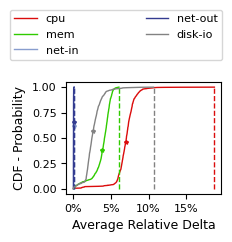

azure
min-cpu 3.210159909862948
max-cpu 10.301965149701239
avg-cpu 4.426647778041958


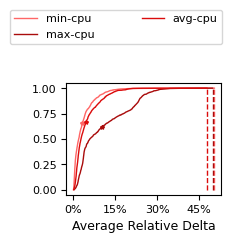

bitbrains
cpu-raw 3.0518700716967433
cpu 3.0518696740913778
mem-raw 5.73204100737988
disk-rd 0.20885423085161897
disk-wr 1.4136478612726502
net-recv 0.6605194122606507
net-xmit 1.0267391843523728


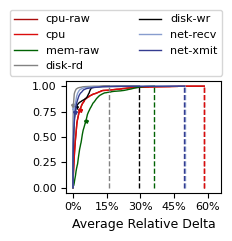

google
avg-cpu 3.3852855472077827
avg-mem 2.202144305148817
max-cpu 5.691508503649091
max-mem 2.846848386294722


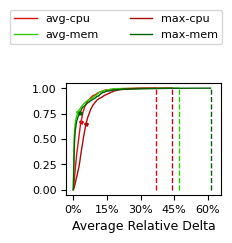

In [67]:
for name, input, columns in all_datasets:
    print(name)
    fig, ax = plt.subplots(figsize=(2,1.45))

    base = 0.15
    if name == 'alibaba':
        base =0.05
        col_names = ['cpu', 'mem', 'net-in', 'net-out', 'disk-io']
        ncols = 2
        yleg = 1.15
    elif name == 'azure':
        col_names = ['min-cpu', 'max-cpu', 'avg-cpu']
        ncols = 2
        yleg = 1.3
    elif name == 'bitbrains':
        col_names = ['cpu-raw', 'cpu', 'mem-raw', 'disk-rd', 'disk-wr', 'net-recv', 'net-xmit']
        ncols = 2
        yleg = 1
    else:
        col_names = ['avg-cpu', 'avg-mem', 'max-cpu', 'max-mem']
        ncols = 2
        yleg = 1.3

    i = 0
    lines = []
    for col, col_name in zip(columns, col_names):
        tmp_color = pick_color(col_name)
        measures = res[name][col][measure]


        x = np.sort(measures)
        y = 1. * np.arange(len(measures)) / (len(measures) - 1)

        avg_x, avg_y = find_avg(measures, x, y)
        print(col_name, avg_x*100)

        ax.vlines(x = x[-1], ymin = 0, ymax = 1, colors=tmp_color, ls='--', linewidth=1)
        ax.plot(avg_x, avg_y, marker="*", markersize=3, markeredgecolor=tmp_color)
        line = ax.plot(x, y, label=col_name, color=tmp_color, linewidth=1)
        lines.extend(line)

        i = i + 1

    ax.legend(loc='lower left', bbox_to_anchor=(-0.4, yleg, 1.44, .1), fontsize=8, ncols=ncols, handlelength=2, mode='expand')
    
    ax.set_xlabel('Average Relative Delta', size=9)
    ax.xaxis.set_major_locator(mpl.ticker.IndexLocator(base=base, offset=0))
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: "{:.0f}%".format(x*100)))
    ax.tick_params(axis='x', labelsize=8)
    
    if name == 'alibaba':
        ax.set_ylabel('CDF - Probability', size=9)
    
    ax.tick_params(axis='y', labelsize=8)

    if name in ['bitbrains', 'google']:
        ax.set_xlim(right=0.66)

    plt.show()

### Figure 4

Average ARD values across all time series of the corresponding resource metric (x-axis) for the Google dataset. 

Each bar corresponds to a different length of the time window, in which case we calculate the delta between the current value of the timeseries and the one reported at the start of the corresponding time window.

window = 1
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.033850930917413244, 0.05685577627417588, 0.02201923000123515, 0.02827138100443598]
window = 2
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.03915750732098352, 0.055055543881234376, 0.025451923915573944, 0.0318169349788967]
window = 4
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.04261398794680197, 0.052576578290649656, 0.029912855033445887, 0.0359659112041372]
window = 6
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.04507288241189068, 0.054938872545270856, 0.03265832613057722, 0.038134158812352395]
window = 12
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.04791268170267649, 0.05356756032754856, 0.036685264315159255, 0.04125520051777965]
window = 24
['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
[0.05231275524077474, 0.054960162445227535, 0.042094685079507504, 0.0462362406693469]


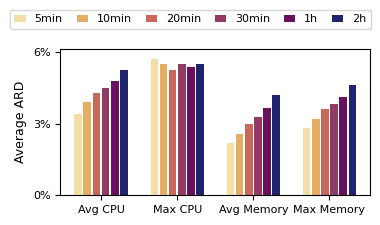

In [68]:
X = ['Avg CPU', 'Max CPU', 'Avg Memory', 'Max Memory']
windows = [1, 2, 4, 6, 12, 24]
windows_names = ['5min', '10min', '20min', '30min', '1h', '2h']
gap = 0.02
offset = 0
X_axis = np.arange(len(X)) + offset

fig, ax = plt.subplots(figsize=(4,1.9))
i = 0
for w, w_name in zip(windows, windows_names):
    print(f"window = {w}")
    print(X)
    if w == 1:
        results = [
            np.mean(res['google']['avg_cpu_usage'][measure]),
            np.mean(res['google']['max_cpu_usage'][measure]),
            np.mean(res['google']['avg_mem_usage'][measure]),
            np.mean(res['google']['max_mem_usage'][measure])
        ]
        print(results)
        ax.bar(X_axis - 0.25 + (0.1 + gap) * i - gap * (len(windows)/2 - 0.5), results, 0.1, label=w_name)
    else:
        results = [
            np.mean(res_win_f[w]['google']['avg_cpu_usage'][measure]),
            np.mean(res_win_f[w]['google']['max_cpu_usage'][measure]),
            np.mean(res_win_f[w]['google']['avg_mem_usage'][measure]),
            np.mean(res_win_f[w]['google']['max_mem_usage'][measure]),
        ]
        print(results)
        ax.bar(X_axis - 0.25 + (0.1 + gap) * i - gap * (len(windows)/2 - 0.5), results, 0.1, label=w_name)

    i = i + 1
ax.set_xticks(X_axis, X)
ax.tick_params(axis='x', labelsize=8)

ax.set_ylabel("Average ARD", size=9)
ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(base=0.03, offset=0))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: "{:.0f}%".format(x*100)))
ax.tick_params(axis='y', labelsize=8)
ax.set_ylim(top=0.06125)

ax.legend(loc='lower left', bbox_to_anchor=(-0.18, 1.1, 1.2, .1), fontsize=8, ncols=6, handlelength=1, mode='expand')

plt.show()